### Latent Dirichlet Allocation (LDA)

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt

In [2]:
mnist = datasets.fetch_openml('mnist_784', version=1)

In [3]:
# train test split
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# standardise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# LDA
n_classes = 10
lda = LDA(n_components=8)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [11]:
# build model 
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train_lda, y_train)

SVC()

Accuracy: 0.9115714285714286
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.95      0.96      0.96      1600
           2       0.90      0.91      0.90      1380
           3       0.88      0.87      0.88      1433
           4       0.91      0.93      0.92      1295
           5       0.86      0.87      0.86      1273
           6       0.95      0.95      0.95      1396
           7       0.95      0.92      0.93      1503
           8       0.87      0.84      0.85      1357
           9       0.89      0.89      0.89      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



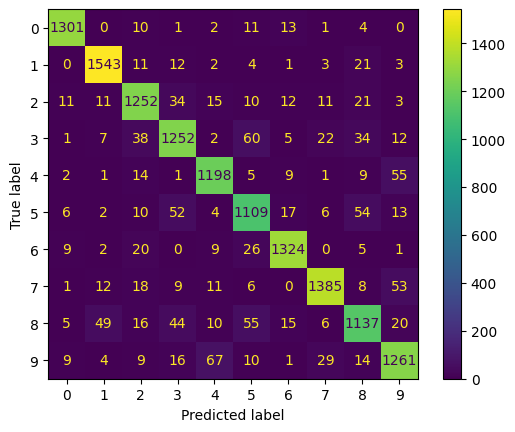

In [12]:
# evaluate model
y_pred = svm.predict(X_test_lda)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show() 